In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Data Files
mobility = "../Resources/PA_2020.csv"
cases = "../Resources/us-counties.csv"

# Read Data
mobilitydf = pd.read_csv(mobility)
casesdf = pd.read_csv(cases)


casesdf['date'] = pd.to_datetime(casesdf.date)
casesdf.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [16]:
mobilitydf['date'] = pd.to_datetime(mobilitydf.date)
mobilitydf.rename(columns={'census_fips_code':'fips'},inplace=True)
mobilitydf.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0


In [17]:
# Data Merger

new_df = pd.merge(mobilitydf,casesdf, how='left')

new_df.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,county,state,cases,deaths
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0,NaN,NaN,NaN,NaN
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0,NaN,NaN,NaN,NaN
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [18]:
# Data Merger

new_df = pd.merge(mobilitydf,casesdf, how='left',on=['date','fips'])

new_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,county,state,cases,deaths
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0,NaN,NaN,NaN,NaN
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0,NaN,NaN,NaN,NaN
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
merged_df=new_df.drop(columns=['metro_area','country_region_code','iso_3166_2_code','county','state','deaths'])
merged_df.fillna(0,inplace=True)
merged_df.rename(columns={'country_region':'Country','sub_region_1':'State','sub_region_2':'County',
                          'retail_and_recreation_percent_change_from_baseline':'Retail & Recreation',
                        'grocery_and_pharmacy_percent_change_from_baseline':'Grocery & Pharmacy',
                        'parks_percent_change_from_baseline':'Parks',
                        'transit_stations_percent_change_from_baseline':'Transit Stations',
                        'workplaces_percent_change_from_baseline':'Workplaces',
                         'residential_percent_change_from_baseline':'Residential','fips':'Fips','date':'Date'},inplace=True)
merged_df.head()

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
0,United States,Pennsylvania,Adams County,42001,2020-02-15,11.0,-1.0,59.0,0.0,-2.0,-1.0,0.0
1,United States,Pennsylvania,Adams County,42001,2020-02-16,15.0,-1.0,62.0,0.0,1.0,0.0,0.0
2,United States,Pennsylvania,Adams County,42001,2020-02-17,19.0,1.0,0.0,0.0,-17.0,4.0,0.0
3,United States,Pennsylvania,Adams County,42001,2020-02-18,-1.0,-4.0,0.0,0.0,0.0,0.0,0.0
4,United States,Pennsylvania,Adams County,42001,2020-02-19,3.0,0.0,22.0,0.0,0.0,0.0,0.0


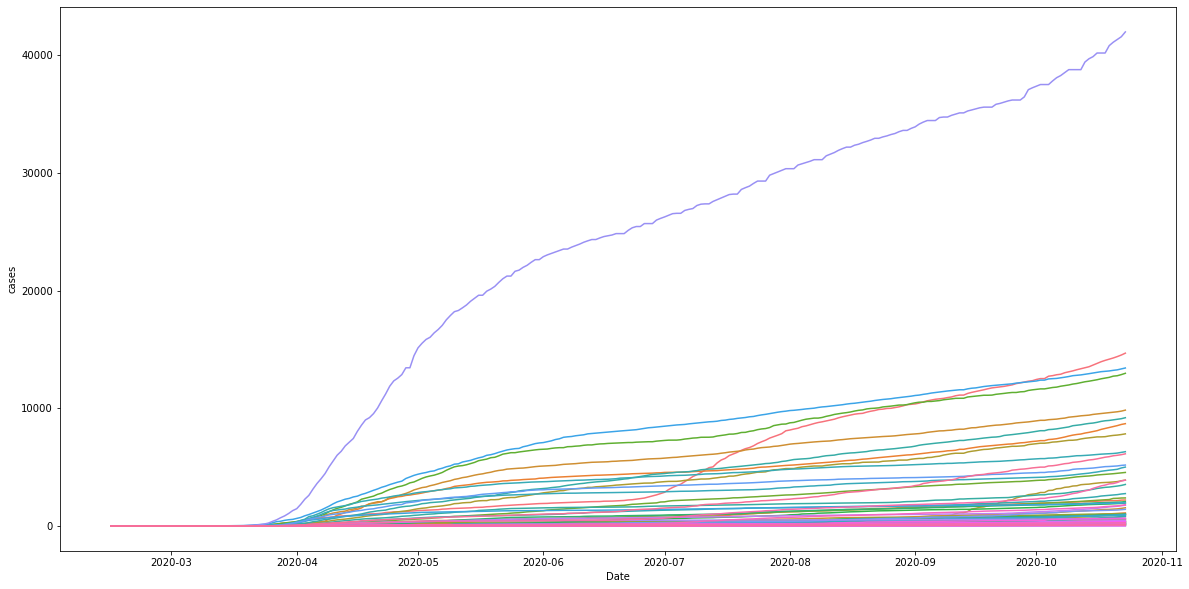

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(data=merged_df, x="Date", y="cases", hue="County")
plt.legend([],[], frameon=False)

In [52]:
five = merged_df.groupby(['County'])['cases'].sum()
five = five.sort_values(ascending=False)
five

County
Philadelphia County    5408322.0
Montgomery County      1743668.0
Delaware County        1591610.0
Allegheny County       1257796.0
Bucks County           1235112.0
                         ...    
McKean County             5640.0
Fulton County             4147.0
Warren County             3551.0
Potter County             2443.0
Sullivan County            739.0
Name: cases, Length: 65, dtype: float64

In [64]:
topfive = list(five.nlargest(11).index)
#bottomfive = list(five.nsmallest(5).index)

In [65]:
topfive="|".join(topfive)

In [66]:
#bottomfive="|".join(bottomfive)

In [67]:
highest=merged_df[merged_df['County'].str.contains(topfive, regex=True)]

In [57]:
#lowest=merged_df[merged_df['County'].str.contains(bottomfive, regex=True)]

In [68]:
combined=pd.concat([highest])
combined

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
252,United States,Pennsylvania,Allegheny County,42003,2020-02-15,2.0,-1.0,19.0,2.0,4.0,0.0,0.0
253,United States,Pennsylvania,Allegheny County,42003,2020-02-16,8.0,1.0,29.0,2.0,4.0,-1.0,0.0
254,United States,Pennsylvania,Allegheny County,42003,2020-02-17,4.0,-3.0,10.0,-14.0,-15.0,4.0,0.0
255,United States,Pennsylvania,Allegheny County,42003,2020-02-18,2.0,-5.0,-1.0,3.0,2.0,0.0,0.0
256,United States,Pennsylvania,Allegheny County,42003,2020-02-19,2.0,-1.0,10.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12162,United States,Pennsylvania,Philadelphia County,42101,2020-10-19,-24.0,-14.0,-23.0,-41.0,-42.0,11.0,40803.0
12163,United States,Pennsylvania,Philadelphia County,42101,2020-10-20,-23.0,-13.0,-21.0,-44.0,-41.0,12.0,41094.0
12164,United States,Pennsylvania,Philadelphia County,42101,2020-10-21,-22.0,-11.0,-2.0,-41.0,-40.0,11.0,41323.0
12165,United States,Pennsylvania,Philadelphia County,42101,2020-10-22,-23.0,-10.0,3.0,-40.0,-39.0,11.0,41561.0


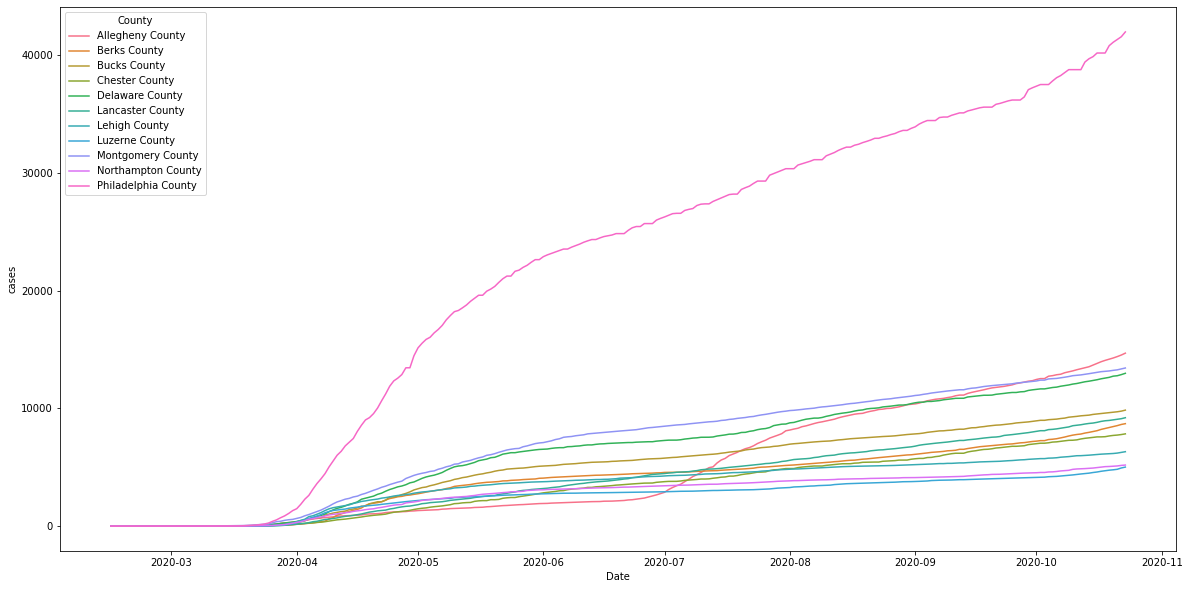

In [69]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined, x="Date", y="cases", hue="County")

In [70]:
combined_df = combined.loc[combined['County'] != 'Philadelphia County']
combined_df

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
252,United States,Pennsylvania,Allegheny County,42003,2020-02-15,2.0,-1.0,19.0,2.0,4.0,0.0,0.0
253,United States,Pennsylvania,Allegheny County,42003,2020-02-16,8.0,1.0,29.0,2.0,4.0,-1.0,0.0
254,United States,Pennsylvania,Allegheny County,42003,2020-02-17,4.0,-3.0,10.0,-14.0,-15.0,4.0,0.0
255,United States,Pennsylvania,Allegheny County,42003,2020-02-18,2.0,-5.0,-1.0,3.0,2.0,0.0,0.0
256,United States,Pennsylvania,Allegheny County,42003,2020-02-19,2.0,-1.0,10.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11412,United States,Pennsylvania,Northampton County,42095,2020-10-19,-10.0,-6.0,72.0,12.0,-32.0,9.0,5062.0
11413,United States,Pennsylvania,Northampton County,42095,2020-10-20,-10.0,-5.0,113.0,15.0,-29.0,8.0,5088.0
11414,United States,Pennsylvania,Northampton County,42095,2020-10-21,-10.0,-5.0,75.0,29.0,-28.0,9.0,5108.0
11415,United States,Pennsylvania,Northampton County,42095,2020-10-22,-10.0,-7.0,108.0,32.0,-26.0,8.0,5155.0


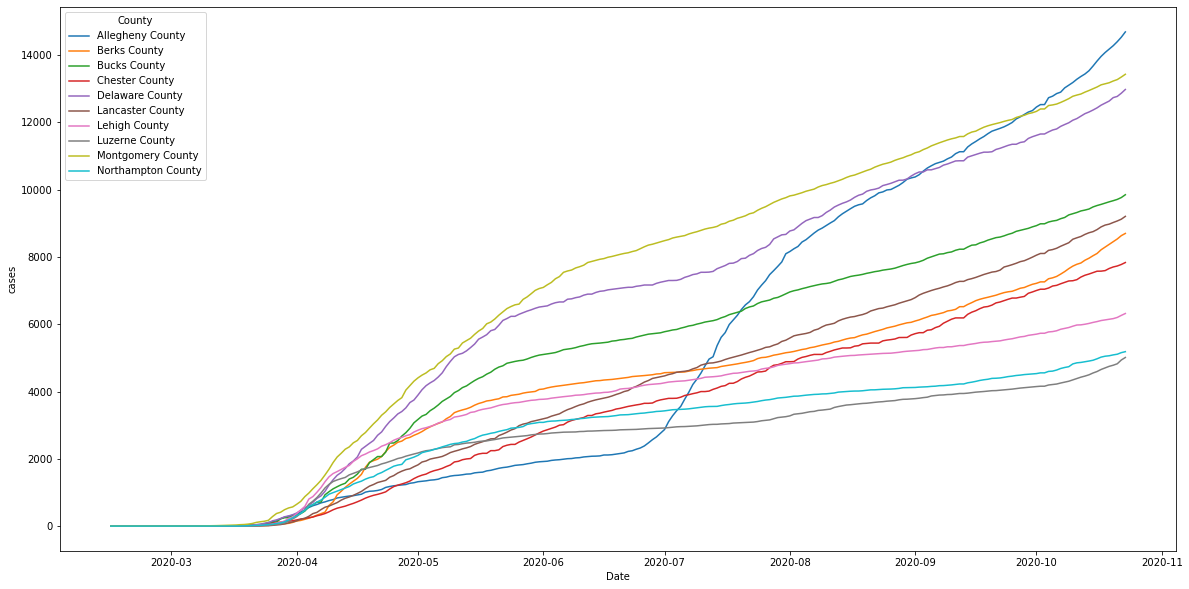

In [71]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined_df, x="Date", y="cases", hue="County")

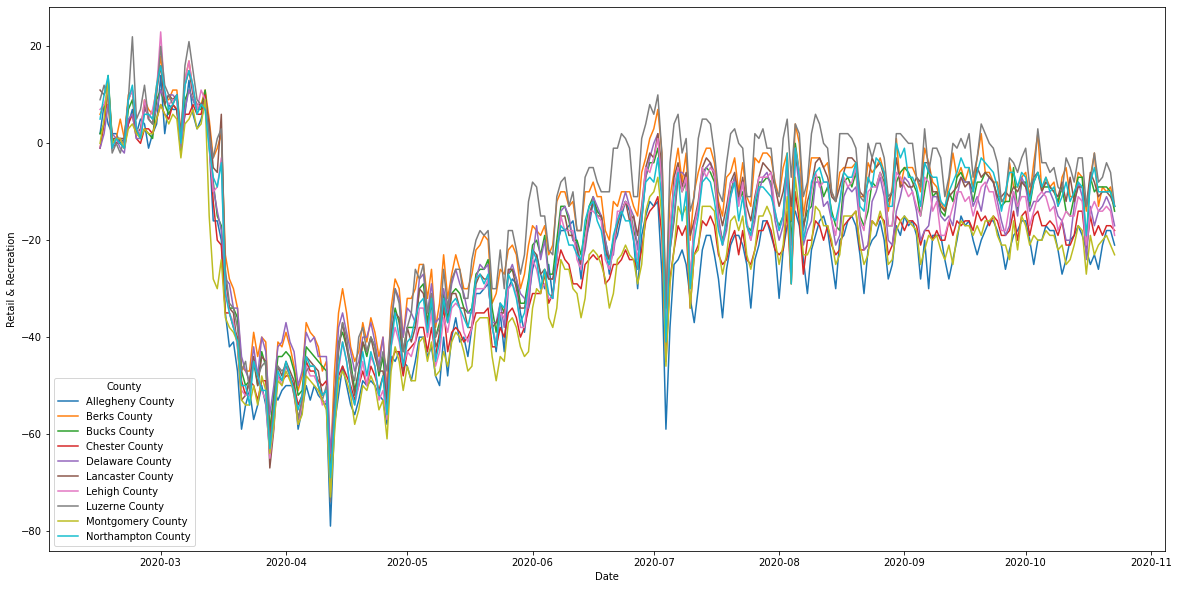

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined_df, x="Date", y="Retail & Recreation", hue="County")

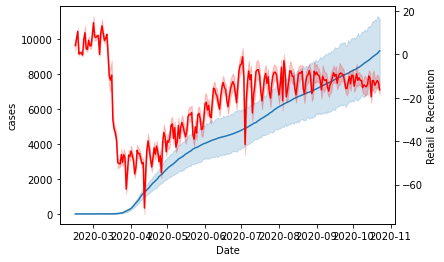

<Figure size 1440x720 with 0 Axes>

In [85]:
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
sns.lineplot(x='Date', y='cases', data=combined_df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Retail & Recreation', data=combined_df, ax=ax2, color='r')
plt.show()